In [ ]:

! pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/
%cd sampledatafoodsales
%ls -a

/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/sampledatafoodsales
sampledatafoodsales.xlsx


In [ ]:

from openpyxl import Workbook

workbook = Workbook()
sheet = workbook.active

sheet["A1"] = "hello"
sheet["B1"] = "world!"

workbook.save(filename="hello_world.xlsx")

In [ ]:

from openpyxl import load_workbook
workbook = load_workbook(filename="stock-quotes.xlsx")

workbook.sheetnames

sheet = workbook.active
print(sheet.title)
print(sheet["A1"])
print(sheet["A2"].value)

Quotes
<Cell 'Quotes'.A1>
To refresh Quote information, go to Data > Refresh All.


In [ ]:

print(sheet.cell(row=6,column=6))
print(sheet.cell(row=6,column=6).value)

rangle_arr = sheet["A1:C2"]

for single_cell in rangle_arr:
  print(single_cell[1].value)

print(rangle_arr)


<Cell 'Quotes'.F6>
None
None
Stock Quotes and Portfolio Template
((<Cell 'Quotes'.A1>, <Cell 'Quotes'.B1>, <MergedCell 'Quotes'.C1>), (<Cell 'Quotes'.A2>, <Cell 'Quotes'.B2>, <MergedCell 'Quotes'.C2>))


In [ ]:

for row in sheet.iter_rows(min_row=1, max_row=2, min_col=1, max_col=3, values_only=True):
  print(row)
  #print(row[0].value)

('Stock Quotes', None, None)
('To refresh Quote information, go to Data > Refresh All.', 'Stock Quotes and Portfolio Template', None)


In [ ]:
from openpyxl.xml.constants import MAX_ROW

sales_workbook = load_workbook(filename="sampledatafoodsales.xlsx")

sales_workbook.sheetnames

food_sheet = sales_workbook['FoodSales']

irow_cnt = 1
for row in food_sheet.iter_rows(min_row=1,max_row=1, values_only=True):
  print(row)


print(type(row))


for display_row in food_sheet.iter_rows(min_row=2,max_row=15, values_only=True):
  print(display_row)


('OrderDate', 'Region', 'City', 'Category', 'Product', 'Quantity', 'UnitPrice', 'TotalPrice')
<class 'tuple'>
(datetime.datetime(2020, 1, 1, 0, 0), 'East', 'Boston', 'Bars', 'Carrot', 33.0, 1.7699999999999998, '=FoodSales!$F2*FoodSales!$G2')
(datetime.datetime(2020, 1, 4, 0, 0), 'East', 'Boston', 'Crackers', 'Whole Wheat', 87.0, 3.4899999999999998, '=FoodSales!$F3*FoodSales!$G3')
(datetime.datetime(2020, 1, 7, 0, 0), 'West', 'Los Angeles', 'Cookies', 'Chocolate Chip', 58.0, 1.8699999999999999, '=FoodSales!$F4*FoodSales!$G4')
(datetime.datetime(2020, 1, 10, 0, 0), 'East', 'New York', 'Cookies', 'Chocolate Chip', 82.0, 1.87, '=FoodSales!$F5*FoodSales!$G5')
(datetime.datetime(2020, 1, 13, 0, 0), 'East', 'Boston', 'Cookies', 'Arrowroot', 38.0, 2.18, '=FoodSales!$F6*FoodSales!$G6')
(datetime.datetime(2020, 1, 16, 0, 0), 'East', 'Boston', 'Bars', 'Carrot', 54.0, 1.77, '=FoodSales!$F7*FoodSales!$G7')
(datetime.datetime(2020, 1, 19, 0, 0), 'East', 'Boston', 'Crackers', 'Whole Wheat', 149.0, 3.

In [3]:

import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [6]:

df = pd.read_excel("sampledatafoodsales.xlsx", sheet_name="FoodSales")

In [10]:
df


,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,2020-01-01,East,Boston,Bars,Carrot,33.0,1.77,58.41
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87.0,3.49,303.63
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58.0,1.87,108.46
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82.0,1.87,153.34
4,2020-01-13,East,Boston,Cookies,Arrowroot,38.0,2.18,82.84
...,...,...,...,...,...,...,...,...
239,2021-12-18,East,Boston,Cookies,Arrowroot,34.0,2.18,74.12
240,2021-12-21,East,Boston,Cookies,Chocolate Chip,245.0,1.87,458.15
241,2021-12-24,East,Boston,Crackers,Whole Wheat,30.0,3.49,104.70
242,2021-12-27,West,Los Angeles,Bars,Bran,30.0,1.87,56.10


In [11]:
df.shape

(244, 8)

In [13]:
df.head()

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,2020-01-01,East,Boston,Bars,Carrot,33.0,1.77,58.41
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87.0,3.49,303.63
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58.0,1.87,108.46
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82.0,1.87,153.34
4,2020-01-13,East,Boston,Cookies,Arrowroot,38.0,2.18,82.84


In [17]:
df['Quantity'].mean()
df.groupby('City')['Quantity'].mean()

City
Boston         64.204545
Los Angeles    68.527273
New York       64.612903
San Diego      51.717949
Name: Quantity, dtype: float64

In [32]:


df.pivot_table(index=['City','Category'],columns='Product',values=['Quantity','TotalPrice'], aggfunc=['max'])

max                                      \
                      Quantity                                       
Product              Arrowroot Banana   Bran Carrot Chocolate Chip   
City        Category                                                 
Boston      Bars           NaN   30.0  105.0  143.0            NaN   
            Cookies      139.0    NaN    NaN    NaN          245.0   
            Crackers       NaN    NaN    NaN    NaN            NaN   
            Snacks         NaN    NaN    NaN    NaN            NaN   
Los Angeles Bars           NaN    NaN   77.0  306.0            NaN   
            Cookies       77.0    NaN    NaN    NaN          232.0   
            Crackers       NaN    NaN    NaN    NaN            NaN   
            Snacks         NaN    NaN    NaN    NaN            NaN   
New York    Bars           NaN    NaN  110.0  141.0            NaN   
            Cookies      237.0    NaN    NaN    NaN           85.0   
            Crackers       NaN    NaN    NaN    NaN            NaN   
            Snacks         NaN    NaN    NaN    NaN            NaN   
San Diego   Bars           NaN    NaN   86.0  118.0            NaN   
            Cookies      139.0    NaN    NaN    NaN           96.0   
            Crackers       NaN    NaN    NaN    NaN            NaN   
            Snacks         NaN    NaN    NaN    NaN            NaN   

                                                                       \
                                                                        
Product              Oatmeal Raisin Potato Chips Pretzels Whole Wheat   
City        Category                                                    
Boston      Bars                NaN          NaN      NaN         NaN   
            Cookies           193.0          NaN      NaN         NaN   
            Crackers            NaN          NaN      NaN       149.0   
            Snacks              NaN        134.0     31.0         NaN   
Los Angeles Bars                NaN          NaN      NaN         NaN   
            Cookies           288.0          NaN      NaN         NaN   
            Crackers            NaN          NaN      NaN        21.0   
            Snacks              NaN        114.0      NaN         NaN   
New York    Bars                NaN          NaN      NaN         NaN   
            Cookies            97.0          NaN      NaN         NaN   
            Crackers            NaN          NaN      NaN        32.0   
            Snacks              NaN         68.0      NaN         NaN   
San Diego   Bars                NaN          NaN      NaN         NaN   
            Cookies            44.0          NaN      NaN         NaN   
            Crackers            NaN          NaN      NaN        28.0   
            Snacks              NaN         41.0      NaN         NaN   

                                                                       \
                     TotalPrice                                         
Product               Arrowroot Banana    Bran  Carrot Chocolate Chip   
City        Category                                                    
Boston      Bars            NaN   68.1  196.35  253.11            NaN   
            Cookies      303.02    NaN     NaN     NaN         458.15   
            Crackers        NaN    NaN     NaN     NaN            NaN   
            Snacks          NaN    NaN     NaN     NaN            NaN   
Los Angeles Bars            NaN    NaN  143.99  541.62            NaN   
            Cookies      167.86    NaN     NaN     NaN         433.84   
            Crackers        NaN    NaN     NaN     NaN            NaN   
            Snacks          NaN    NaN     NaN     NaN            NaN   
New York    Bars            NaN    NaN  205.70  249.57            NaN   
            Cookies      516.66    NaN     NaN     NaN         158.95   
            Crackers        NaN    NaN     NaN     NaN            NaN   
            Snacks          NaN    NaN     NaN     NaN            NaN 

In [34]:
df.pivot_table(index=['City','Category'],columns='Product',values=['Quantity'], aggfunc=['sum'], fill_value=0)

sum                                    \
                      Quantity                                     
Product              Arrowroot Banana Bran Carrot Chocolate Chip   
City        Category                                               
Boston      Bars             0     79  467   1281              0   
            Cookies        880      0    0      0            642   
            Crackers         0      0    0      0              0   
            Snacks           0      0    0      0              0   
Los Angeles Bars             0      0  349   1262              0   
            Cookies        185      0    0      0            837   
            Crackers         0      0    0      0              0   
            Snacks           0      0    0      0              0   
New York    Bars             0      0  563   1120              0   
            Cookies        929      0    0      0            470   
            Crackers         0      0    0      0              0   
            Snacks           0      0    0      0              0   
San Diego   Bars             0      0  196    524              0   
            Cookies        451      0    0      0            496   
            Crackers         0      0    0      0              0   
            Snacks           0      0    0      0              0   

                                                                       
                                                                       
Product              Oatmeal Raisin Potato Chips Pretzels Whole Wheat  
City        Category                                                   
Boston      Bars                  0            0        0           0  
            Cookies            1184            0        0           0  
            Crackers              0            0        0         726  
            Snacks                0          205      186           0  
Los Angeles Bars                  0            0        0           0  
            Cookies             731            0        0           0  
            Crackers              0            0        0          42  
            Snacks                0          363        0           0  
New York    Bars                  0            0        0           0  
            Cookies             457            0        0           0  
            Crackers              0            0        0         141  
            Snacks                0          326        0           0  
San Diego   Bars                  0            0        0           0  
            Cookies             202            0        0           0  
            Crackers              0            0        0          48  
            Snacks                0          100        0           0

In [35]:
df.pivot_table(index=['City','Category'],columns='Product',values=['Quantity'], aggfunc=['sum'], fill_value=0, margins=True, margins_name="Total")

sum                                     \
                      Quantity                                      
Product              Arrowroot Banana  Bran Carrot Chocolate Chip   
City        Category                                                
Boston      Bars             0     79   467   1281              0   
            Cookies        880      0     0      0            642   
            Crackers         0      0     0      0              0   
            Snacks           0      0     0      0              0   
Los Angeles Bars             0      0   349   1262              0   
            Cookies        185      0     0      0            837   
            Crackers         0      0     0      0              0   
            Snacks           0      0     0      0              0   
New York    Bars             0      0   563   1120              0   
            Cookies        929      0     0      0            470   
            Crackers         0      0     0      0              0   
            Snacks           0      0     0      0              0   
San Diego   Bars             0      0   196    524              0   
            Cookies        451      0     0      0            496   
            Crackers         0      0     0      0              0   
            Snacks           0      0     0      0              0   
Total                     2445     79  1575   4187           2445   

                                                                                
                                                                                
Product              Oatmeal Raisin Potato Chips Pretzels Whole Wheat    Total  
City        Category                                                            
Boston      Bars                  0            0        0           0   1827.0  
            Cookies            1184            0        0           0   2706.0  
            Crackers              0            0        0         726    726.0  
            Snacks                0          205      186           0    391.0  
Los Angeles Bars                  0            0        0           0   1611.0  
            Cookies             731            0        0           0   1753.0  
            Crackers              0            0        0          42     42.0  
            Snacks                0          363        0           0    363.0  
New York    Bars                  0            0        0           0   1683.0  
            Cookies             457            0        0           0   1856.0  
            Crackers              0            0        0         141    141.0  
            Snacks                0          326        0           0    326.0  
San Diego   Bars                  0            0        0           0    720.0  
            Cookies             202            0        0           0   1149.0  
            Crackers              0            0        0          48     48.0  
            Snacks                0          100        0           0    100.0  
Total                          2574          994      186         957  15442.0

In [39]:
df.pivot_table(index=['Category'],columns='City',values=['Quantity'], aggfunc=[np.average,'sum'], fill_value=0, margins=True, margins_name="Total")

average                                                   sum  \
           Quantity                                              Quantity   
City         Boston Los Angeles   New York  San Diego      Total   Boston   
Category                                                                    
Bars      63.000000   67.125000  64.730769  48.000000  62.138298     1827   
Cookies   84.562500   79.681818  84.363636  60.473684  78.568421     2706   
Crackers  42.705882   21.000000  28.200000  24.000000  36.807692      726   
Snacks    39.100000   51.857143  36.222222  33.333333  40.689655      391   
Total     64.204545   68.527273  64.612903  51.717949  63.286885     5650   

                                                  
                                                  
City     Los Angeles New York San Diego    Total  
Category                                          
Bars            1611     1683       720   5841.0  
Cookies         1753     1856      1149   7464.0  
Crackers          42      141        48    957.0  
Snacks           363      326       100   1180.0  
Total           3769     4006      2017  15442.0

In [41]:

save_table = df.pivot_table(index=['Category'],columns='City',values=['Quantity'], aggfunc=[np.average,'sum'], fill_value=0, margins=True, margins_name="Total")

In [42]:
save_table.query('Category == ["Bars", "Crackers"]')


average                                                  sum  \
           Quantity                                             Quantity   
City         Boston Los Angeles   New York San Diego      Total   Boston   
Category                                                                   
Bars      63.000000      67.125  64.730769      48.0  62.138298     1827   
Crackers  42.705882      21.000  28.200000      24.0  36.807692      726   

                                                 
                                                 
City     Los Angeles New York San Diego   Total  
Category                                         
Bars            1611     1683       720  5841.0  
Crackers          42      141        48   957.0

In [47]:
save_table.sort_values(by="Boston")

KeyError: ignored

In [48]:
save2_table = df.pivot_table(index=['Category'],columns='City',values=['Quantity'], aggfunc=['sum'], fill_value=0, margins=True, margins_name="Total")

In [49]:
save2_table.head()

sum                                        
         Quantity                                        
City       Boston Los Angeles New York San Diego    Total
Category                                                 
Bars         1827        1611     1683       720   5841.0
Cookies      2706        1753     1856      1149   7464.0
Crackers      726          42      141        48    957.0
Snacks        391         363      326       100   1180.0
Total        5650        3769     4006      2017  15442.0

In [66]:
save2_table.sort_values(by=('sum','Quantity','Boston'), ascending=True)

sum                                        
         Quantity                                        
City       Boston Los Angeles New York San Diego    Total
Category                                                 
Snacks        391         363      326       100   1180.0
Crackers      726          42      141        48    957.0
Bars         1827        1611     1683       720   5841.0
Cookies      2706        1753     1856      1149   7464.0
Total        5650        3769     4006      2017  15442.0

In [68]:
save2_table.sort_values(by=('sum','Quantity','San Diego'), ascending=True)

sum                                        
         Quantity                                        
City       Boston Los Angeles New York San Diego    Total
Category                                                 
Crackers      726          42      141        48    957.0
Snacks        391         363      326       100   1180.0
Bars         1827        1611     1683       720   5841.0
Cookies      2706        1753     1856      1149   7464.0
Total        5650        3769     4006      2017  15442.0

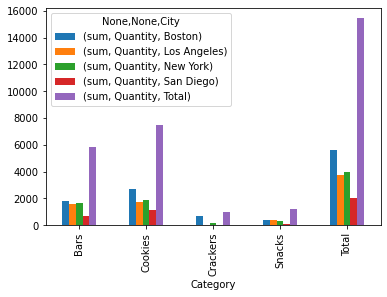

In [69]:
save2_table.plot(kind='bar')